# Machine Learning - Random Forest Tree

In [24]:
# Importing Important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine
import numpy as np


In [4]:
# Reading the datasetload_wine(as_frame=True)
# load_wine loads the wine dataset from scikit-learn.
# as_frame=True means it returns the data as a pandas DataFrame (like a table).
data = load_wine(as_frame = True)
df = data.frame
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 1. Handling Null Values

In [5]:
# Checking null values of each column
df.isnull().sum()

# There are no null values so we move forward to Data Preprocessing

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


## 2. Data - PreProcessing

In [10]:
# Now we will chose the features and the target
# Target will be our target column and the rest column as the features
# Dropping column target from x
x = df.drop(columns = ['target'])
y = df['target']


In [12]:
print(y)


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


In [13]:
print(x)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]


## 3. Splitting Columns ( Train and Test )

In [49]:
# stratidy = y Keeps the same class balance in both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42, stratify = y)


## 4. Training Random Forest Classifier Model

In [16]:
# Training of randomforestclassifier
# n_estimators=100 means the model will build 100 decision trees.
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 5. Random Forest Classifier Prediction

In [18]:
# Prediction
y_pred = rfc.predict(X_test)


## 6. Evaluating The Model

In [19]:
# Evaluation of model
Accuracy = accuracy_score(y_test, y_pred)
ConMatrix = confusion_matrix(y_test, y_pred)
Model = classification_report(y_test, y_pred)


In [48]:
# Printing the model
print(f"Accuracy:  {Accuracy:.2f}")
print(f"Confusion Matrix: {ConMatrix}")
print(f"Classification Report: {Model}")


Accuracy:  1.00
Confusion Matrix: [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 7. Feature Importance

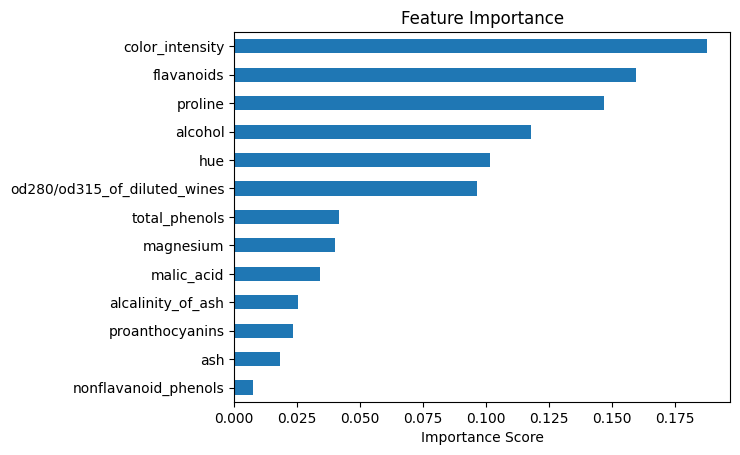

In [45]:
# Making horizontal Bar chart for feature_importance in descending order
# rfc.feature_importances_: This gives the importance score for each feature (column) from the Random Forest model.
# tells how helpful each feature was in making predictions.
# pd.Series(..., index=x.columns): Turns importance scores into a Pandas Series, using the column names as labels.
fea_imp = pd.Series(rfc.feature_importances_, index = x.columns).sort_values()
fea_imp.plot(kind = 'barh')
plt.title('Feature Importance')
plt.xlabel('Importance Score')

plt.show()